<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/Practice_TS_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("salesdata.csv")

In [ ]:
df.columns

Index(['Date', 'Sales'], dtype='object')

In [ ]:
df = pd.read_csv("salesdata.csv",parse_dates=['Date'],index_col='Date')

In [ ]:
df.head()

,Sales
Date,
2007-01-01,4600
2007-02-01,5700
2007-03-01,6800
2007-04-01,7900
2007-05-01,9000


In [ ]:
df.index.min(),df.index.max() 

(Timestamp('2007-01-01 00:00:00'), Timestamp('2016-12-01 00:00:00'))

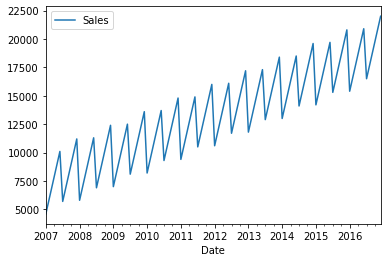

In [ ]:
df.plot()

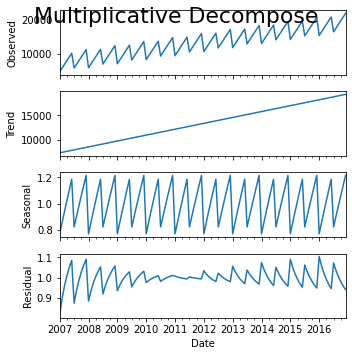

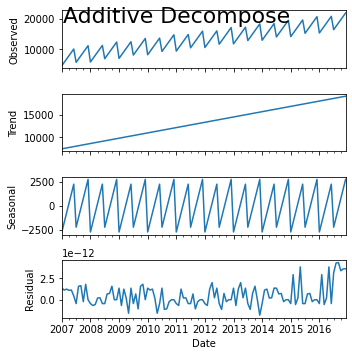

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Sales'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Sales'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
#Augmented Dickey–Fuller test
result = adfuller(df.Sales.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -2.13133644506206
p-value: 0.23210213278680153
Critial Values:
   1%, -3.4936021509366793
Critial Values:
   5%, -2.8892174239808703
Critial Values:
   10%, -2.58153320754717


In [ ]:
df['RA'] = df.Sales.rolling(12,min_periods=2).mean()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb5a29cf940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5a29cf940>)

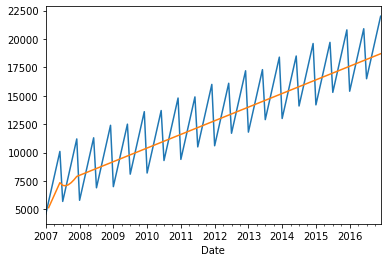

In [ ]:
df['Sales'].plot(),df['RA'].plot()

In [ ]:
df['RA_detrend'] = df.Sales - df.RA

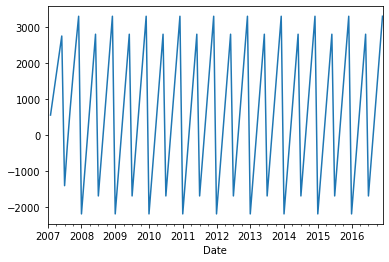

In [ ]:
df.RA_detrend.plot()

In [ ]:
df['RA_detrend'].head()

Date
2007-01-01       NaN
2007-02-01     550.0
2007-03-01    1100.0
2007-04-01    1650.0
2007-05-01    2200.0
Name: RA_detrend, dtype: float64

In [ ]:
# ADF Test
#Augmented Dickey–Fuller test
result = adfuller(df.RA_detrend.values[1:], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.339525450161826
p-value: 3.20407912397833e-13
Critial Values:
   1%, -3.4942202045135513
Critial Values:
   5%, -2.889485291005291
Critial Values:
   10%, -2.5816762131519275


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def ts_train_test_split(X,per=0.66):
    size = int(len(X) * per)
    train, test = X[0:size], X[size:len(X)]
    return train,test

In [ ]:
train,test = ts_train_test_split(df.loc['2007-02-01':,'RA_detrend'],per=0.70)

In [ ]:
len(train),len(test)

(83, 36)

In [ ]:
# for 
model = ARIMA(train, order=(2,0,6)) # order is p,d,q
model_fit = model.fit()
output = model_fit.predict(start=83,end=118,dynamic=True)
print("RMSE is = ", mean_squared_error(test,output))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RMSE is =  2622581.8757181857


In [ ]:
output_1 = model_fit.forecast(len(test))
print("RMSE is = ", mean_squared_error(test,output_1[0]))

RMSE is =  2622581.8757181857


In [ ]:
print('expected=',test)

expected= Date
2014-01-01   -2200.0
2014-02-01   -1200.0
2014-03-01    -200.0
2014-04-01     800.0
2014-05-01    1800.0
2014-06-01    2800.0
2014-07-01   -1700.0
2014-08-01    -700.0
2014-09-01     300.0
2014-10-01    1300.0
2014-11-01    2300.0
2014-12-01    3300.0
2015-01-01   -2200.0
2015-02-01   -1200.0
2015-03-01    -200.0
2015-04-01     800.0
2015-05-01    1800.0
2015-06-01    2800.0
2015-07-01   -1700.0
2015-08-01    -700.0
2015-09-01     300.0
2015-10-01    1300.0
2015-11-01    2300.0
2015-12-01    3300.0
2016-01-01   -2200.0
2016-02-01   -1200.0
2016-03-01    -200.0
2016-04-01     800.0
2016-05-01    1800.0
2016-06-01    2800.0
2016-07-01   -1700.0
2016-08-01    -700.0
2016-09-01     300.0
2016-10-01    1300.0
2016-11-01    2300.0
2016-12-01    3300.0
Name: RA_detrend, dtype: float64


In [ ]:
print('predicted=',output)

predicted= 2014-01-01    -725.946488
2014-02-01    -845.765062
2014-03-01    -531.070119
2014-04-01     -26.973021
2014-05-01    1145.934084
2014-06-01    1725.970466
2014-07-01     672.381291
2014-08-01     717.958684
2014-09-01     636.338566
2014-10-01     639.919161
2014-11-01     633.596130
2014-12-01     633.877369
2015-01-01     633.387528
2015-02-01     633.409613
2015-03-01     633.371666
2015-04-01     633.373400
2015-05-01     633.370460
2015-06-01     633.370596
2015-07-01     633.370368
2015-08-01     633.370379
2015-09-01     633.370361
2015-10-01     633.370362
2015-11-01     633.370361
2015-12-01     633.370361
2016-01-01     633.370361
2016-02-01     633.370361
2016-03-01     633.370361
2016-04-01     633.370361
2016-05-01     633.370361
2016-06-01     633.370361
2016-07-01     633.370361
2016-08-01     633.370361
2016-09-01     633.370361
2016-10-01     633.370361
2016-11-01     633.370361
2016-12-01     633.370361
Freq: MS, dtype: float64


In [ ]:
output_1

(array([-725.94648837, -845.76506223, -531.0701192 ,  -26.9730212 ,
        1145.93408394, 1725.97046638,  672.38129059,  717.95868393,
         636.33856564,  639.91916096,  633.59613047,  633.87736912,
         633.38752774,  633.40961344,  633.37166554,  633.37339961,
         633.37045978,  633.3705959 ,  633.37036815,  633.37037884,
         633.37036119,  633.37036203,  633.37036066,  633.37036073,
         633.37036062,  633.37036063,  633.37036062,  633.37036062,
         633.37036062,  633.37036062,  633.37036062,  633.37036062,
         633.37036062,  633.37036062,  633.37036062,  633.37036062]),
 array([ 870.38667836,  877.81427851,  936.16468479, 1027.3079761 ,
        1127.74232302, 1127.8034299 , 1382.36410099, 1382.36416167,
        1383.74954214, 1383.74954216, 1383.7578464 , 1383.7578464 ,
        1383.7578962 , 1383.7578962 , 1383.7578965 , 1383.7578965 ,
        1383.7578965 , 1383.7578965 , 1383.7578965 , 1383.7578965 ,
        1383.7578965 , 1383.7578965 , 1383.757